<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 161.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 145.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 130.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 117.2 MB/s eta 0:00:00


In [2]:
!pip install seaborn

import seaborn as sns

#### Step 1: Load the dataset


In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




In [4]:
print(df['Age'].unique())

['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


In [5]:
# 定义年龄区间的映射字典
age_mapping = {
    'Under 18 years old': 13,   # 取中间值 17.5 向下取整
    '18-24 years old': 21,     # 取中间值 21
    '25-34 years old': 30,     # 取中间值 29.5 向下取整
    '35-44 years old': 40,     # 取中间值 39.5 向下取整
    '45-54 years old': 50,     # 取中间值 49.5 向下取整
    '55-64 years old': 60,     # 取中间值 59.5 向下取整
    '65 years or older': 70,   # 取中间值 67.5 向下取整
    'Prefer not to say': None  # 如果不想透露，则设置为 None 或其他合适的值
}

# 使用 map 方法进行映射
df['Age_Numeric'] = df['Age'].map(age_mapping)
print(df['Age_Numeric'].unique())

[13. 40. 50. 21. 30. 60. nan 70.]


In [6]:
df.dropna(subset=["Age_Numeric"], inplace=True)
print(df['Age_Numeric'].unique())

[13. 40. 50. 21. 30. 60. 70.]


In [7]:
df.dropna(subset=["JobSatPoints_6"], inplace=True)

In [8]:
df[['Age_Numeric','JobSatPoints_6']].corr()

,Age_Numeric,JobSatPoints_6
Age_Numeric,1.000000,-0.049752
JobSatPoints_6,-0.049752,1.000000


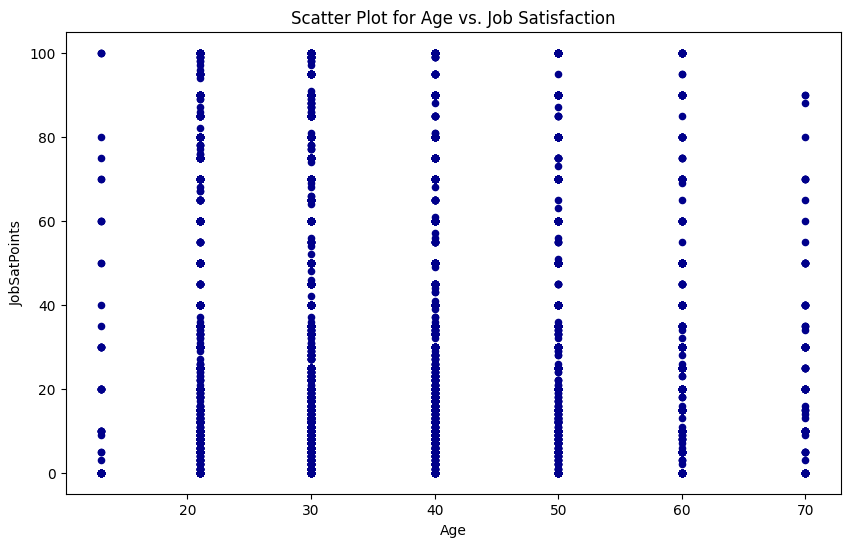

In [9]:
df.plot(kind='scatter', x='Age_Numeric', y='JobSatPoints_6', figsize=(10, 6), color='darkblue')

plt.title('Scatter Plot for Age vs. Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('JobSatPoints')

plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


In [9]:
print(df['ConvertedCompYearly'].unique())

[   nan  7322. 91295. ...  4364. 15637.  9711.]


In [10]:
df.dropna(subset=["ConvertedCompYearly"], inplace=True)

,JobSatPoints_6,ConvertedCompYearly
JobSatPoints_6,1.000000,-0.008561
ConvertedCompYearly,-0.008561,1.000000


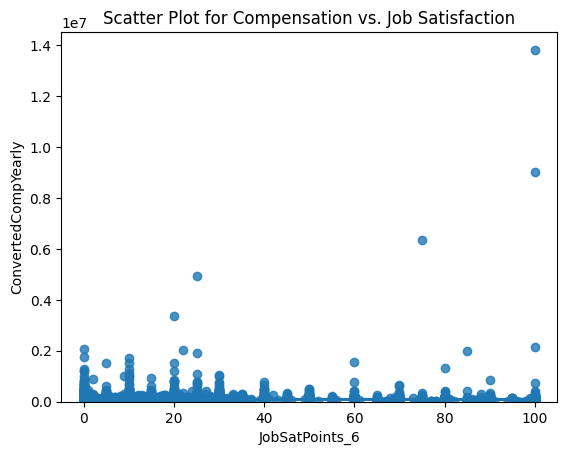

In [12]:
sns.regplot(x="JobSatPoints_6", y="ConvertedCompYearly", data=df)
plt.title('Scatter Plot for Compensation vs. Job Satisfaction')
plt.ylim(0,)
df[["JobSatPoints_6", "ConvertedCompYearly"]].corr()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


(0.0, 105.0)

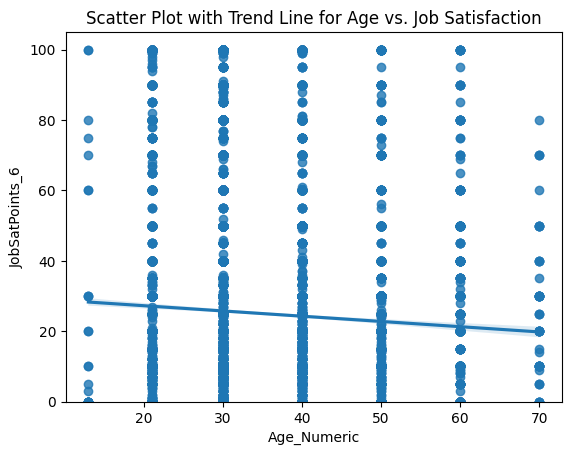

In [13]:
sns.regplot(x="Age_Numeric", y="JobSatPoints_6", data=df)
plt.title('Scatter Plot with Trend Line for Age vs. Job Satisfaction')
plt.ylim(0,)

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


In [14]:
print(df['YearsCodePro'].unique())

['1' '6' '7' '18' '30' '16' '17' '4' '15' '11' '23' '10' '9' '8' '24' '27'
 '12' '26' '40' '14' '22' '28' '25' '20' 'Less than 1 year' '13' '19' '3'
 '35' '31' '41' '5' '2' nan '32' '38' '21' 'More than 50 years' '36' '34'
 '43' '37' '33' '45' '29' '42' '39' '44' '46' '50' '48' '47']


In [15]:
df.dropna(subset=["YearsCodePro"], inplace=True)

In [17]:
# 定义特殊值的映射字典
special_values_mapping = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}

# 使用 map 方法进行映射
df['YearsCodePro_Mapped'] = df['YearsCodePro'].map(special_values_mapping)

# 填充未映射的值
df['YearsCodePro_Mapped'].fillna(df['YearsCodePro'], inplace=True)

# 将 YearsCodePro_Mapped 列转换为浮点数
df['YearsCodePro_Float'] = pd.to_numeric(df['YearsCodePro_Mapped'])

# 打印描述性统计信息
print("\nDescription of YearsCodePro_Float:")
print(df['YearsCodePro_Float'].describe())


Description of YearsCodePro_Float:
count    16138.000000
mean        10.005887
std          8.203098
min          0.500000
25%          4.000000
50%          8.000000
75%         14.000000
max         51.000000
Name: YearsCodePro_Float, dtype: float64


/tmp/ipykernel_300/1530166584.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsCodePro_Mapped'].fillna(df['YearsCodePro'], inplace=True)
/tmp/ipykernel_300/1530166584.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['1' '6' '7' ... '30' '1' '35']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['YearsCodePro_Mapped'].fillna(df['YearsCodePro'], inplace=True)


(0.0, 53.81055799095617)

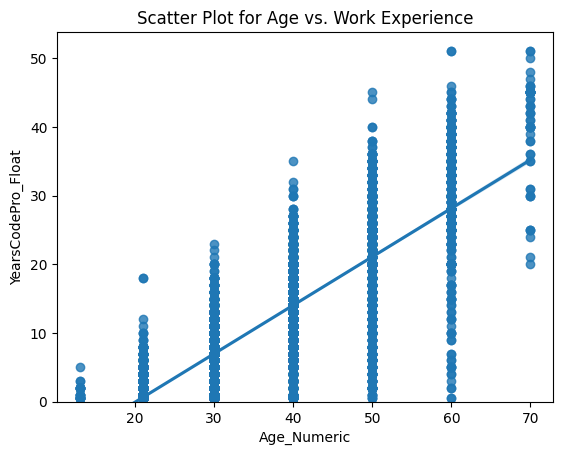

In [18]:
sns.regplot(x="Age_Numeric", y="YearsCodePro_Float", data=df)
plt.title('Scatter Plot for Age vs. Work Experience')
plt.ylim(0,)

In [19]:
df[["Age_Numeric","YearsCodePro_Float"]].corr()

,Age_Numeric,YearsCodePro_Float
Age_Numeric,1.00000,0.81821
YearsCodePro_Float,0.81821,1.00000


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


In [20]:
print(df['ConvertedCompYearly'].unique())

[  7322.  91295. 110000. ...   4364.  15637.   9711.]


Text(0.5, 1.0, 'Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size')

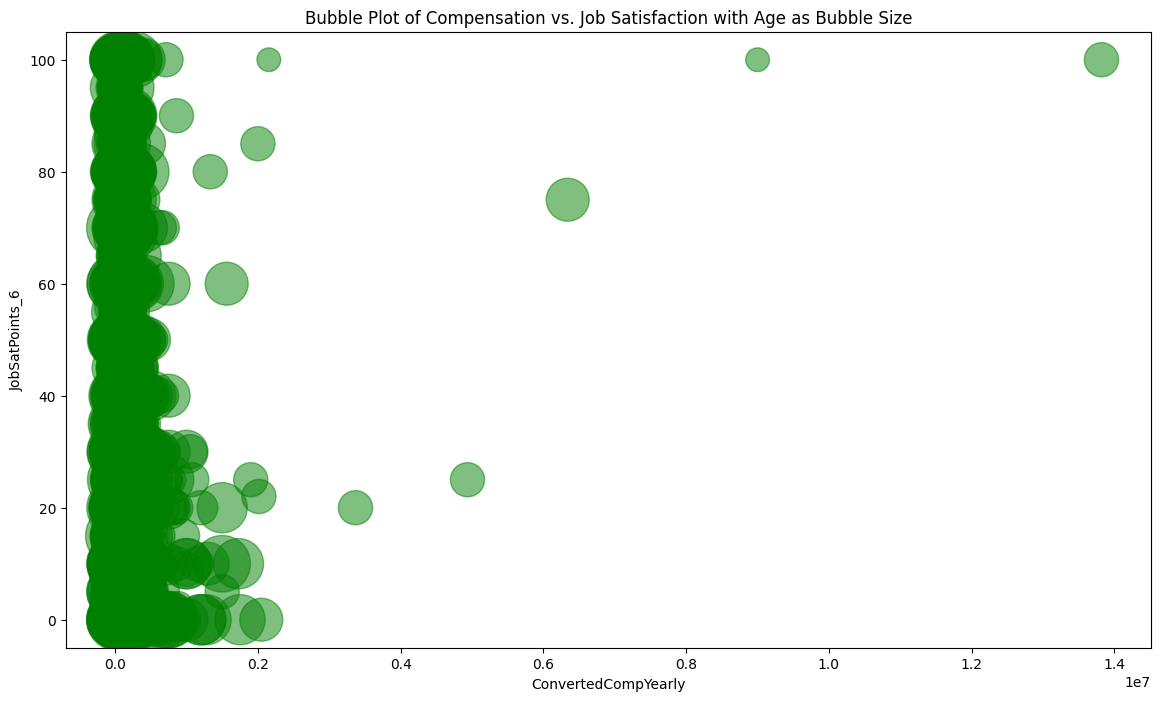

In [22]:
norm_Age = (df['Age_Numeric'] - df['Age_Numeric'].min()) / (df['Age_Numeric'].max() - df['Age_Numeric'].min())

ax = df.plot(kind='scatter',x='ConvertedCompYearly',y='JobSatPoints_6',figsize=(14, 8),alpha=0.5,color='green',s=norm_Age * 2000 + 10)
ax.set_title('Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size')

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


In [23]:
print(df['LanguageHaveWorkedWith'].unique())

['Assembly;Bash/Shell (all shells);C;C++;HTML/CSS;Java;JavaScript;Python;R;SQL;TypeScript'
 'JavaScript;Julia;Python;SQL;TypeScript'
 'HTML/CSS;JavaScript;Python;SQL;TypeScript' ...
 'Bash/Shell (all shells);C;HTML/CSS;Java;JavaScript;PHP;SQL'
 'C#;HTML/CSS;Java;JavaScript;PHP;Python'
 'Assembly;C;C++;Java;Objective-C;PHP;SQL']


In [24]:
# 首先，将LanguageHaveWorkedWith列中的字符串拆分成列表
df['Languages'] = df['LanguageHaveWorkedWith'].str.split(';')

# 然后，使用explode方法将每个列表中的编程语言拆分成单独的行
df_exploded = df.explode('Languages')

# 现在，df_exploded中的每一行都只包含一个编程语言
print(df_exploded[['Languages', 'JobSatPoints_6']].head())

                  Languages  JobSatPoints_6
72                 Assembly            65.0
72  Bash/Shell (all shells)            65.0
72                        C            65.0
72                      C++            65.0
72                 HTML/CSS            65.0


In [26]:
df_exploded = df_exploded.reset_index(drop=True)

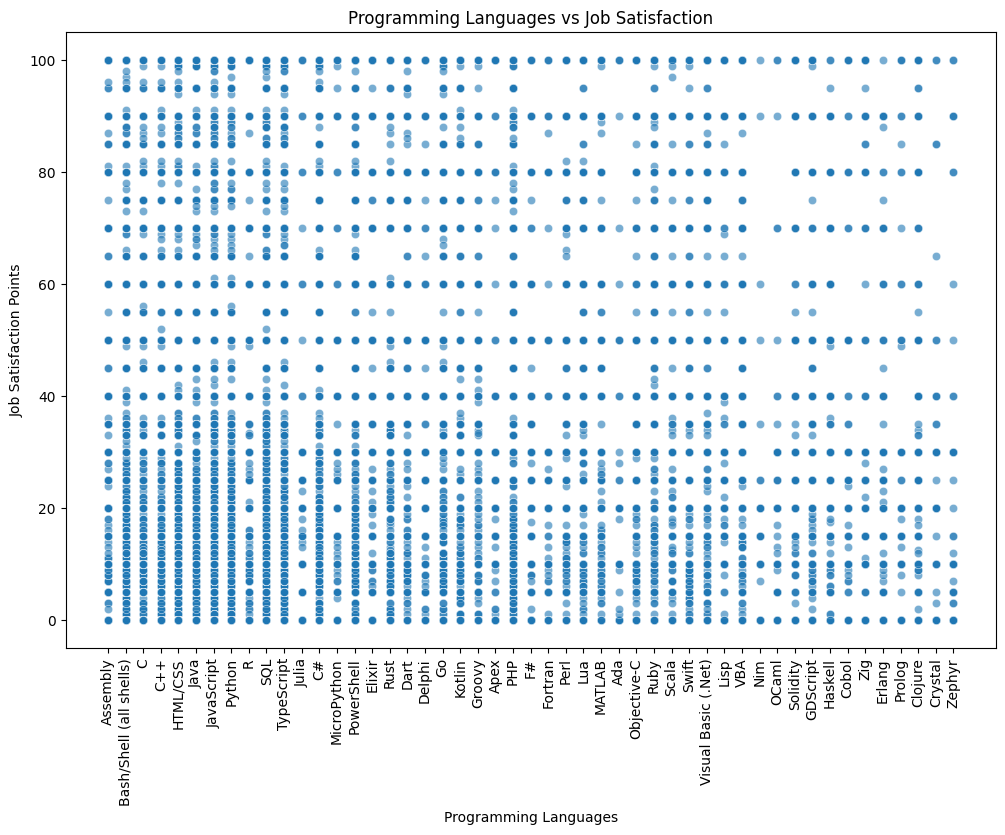

In [30]:
# 使用seaborn绘制散点图
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_exploded, x='Languages', y='JobSatPoints_6', alpha=0.6)

# 设置图表标题和标签
plt.title('Programming Languages vs Job Satisfaction')
plt.xlabel('Programming Languages')
plt.ylabel('Job Satisfaction Points')

# 旋转x轴标签以便更好地阅读
plt.xticks(rotation=90)

# 显示图表
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


In [32]:
# 定义分类函数
def categorize_employment(status):
    if 'Employed' in status:
        return 'Employed'
    elif 'Independent contractor, freelancer, or self-employed' in status:
        return 'Self-Employed'
    elif 'Student' in status:
        return 'Student'
    elif 'Not employed' in status:
        return 'Unemployed'
    elif 'Retired' in status:
        return 'Retired'
    else:
        return 'Other'

# 应用分类函数
df['Employment_Category'] = df['Employment'].apply(categorize_employment)

# 查看分类后的唯一值
print(df['Employment_Category'].unique())

['Employed' 'Self-Employed' 'Unemployed']


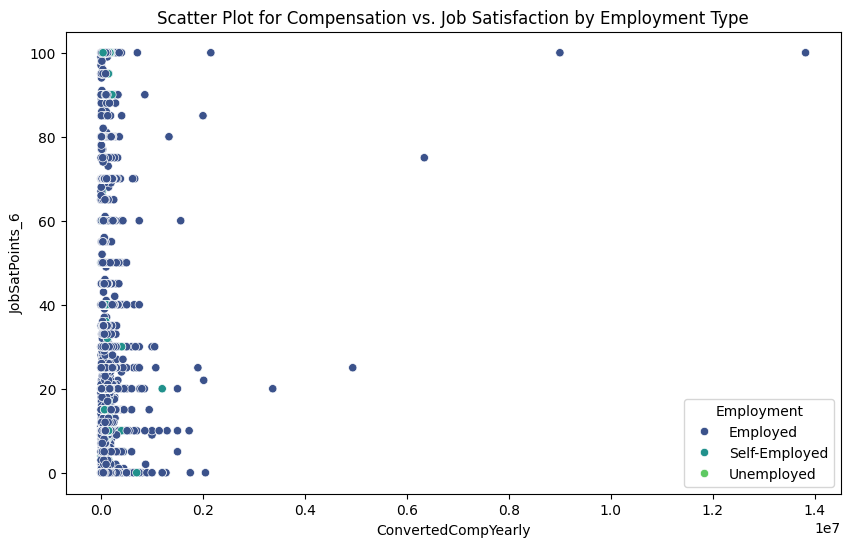

In [33]:
# 设置图形大小
plt.figure(figsize=(10, 6))

# 使用 seaborn 绘制散点图
sns.scatterplot(data=df, x='ConvertedCompYearly', y='JobSatPoints_6', hue='Employment_Category', palette='viridis')

# 添加标题和标签
plt.title('Scatter Plot for Compensation vs. Job Satisfaction by Employment Type')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('JobSatPoints_6')

# 显示图例
plt.legend(title='Employment')

# 显示图形
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


In [36]:
country_counts = df['Country'].value_counts()
print(country_counts)

Country
United States of America                                3230
Germany                                                 1446
United Kingdom of Great Britain and Northern Ireland     926
Ukraine                                                  834
India                                                    801
                                                        ... 
Botswana                                                   1
Barbados                                                   1
Suriname                                                   1
Nomadic                                                    1
Haiti                                                      1
Name: count, Length: 156, dtype: int64


In [40]:
# 筛选出出现次数大于等于 500 的国家
top_countries = country_counts[country_counts >= 500].index.tolist()

In [42]:
filtered_df = df[df['Country'].isin(top_countries)]

In [43]:
print(filtered_df['YearsCodePro'].unique())

['7' '18' '30' '17' '1' '15' '4' '11' '23' '10' '8' '24' '12' '26' '40'
 '16' '9' '22' '25' '20' '13' '19' '3' '35' '31' '41' '5' '6' '14'
 'Less than 1 year' '2' '32' '28' '38' '27' '21' 'More than 50 years' '36'
 '34' '43' '33' '45' '29' '42' '37' '39' '44' '46' '50' '48']


In [44]:
# 定义特殊值的映射字典
special_values_mapping = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}

# 使用 map 方法进行映射
filtered_df['YearsCodePro_Mapped'] = filtered_df['YearsCodePro'].map(special_values_mapping)

# 填充未映射的值
filtered_df['YearsCodePro_Mapped'].fillna(filtered_df['YearsCodePro'], inplace=True)

# 将 YearsCodePro_Mapped 列转换为浮点数
filtered_df['YearsCodePro_Float'] = pd.to_numeric(filtered_df['YearsCodePro_Mapped'])


/tmp/ipykernel_300/1809675188.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['YearsCodePro_Mapped'] = filtered_df['YearsCodePro'].map(special_values_mapping)
/tmp/ipykernel_300/1809675188.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_df['YearsCodePro_Mapp

/tmp/ipykernel_300/663196725.py:25: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


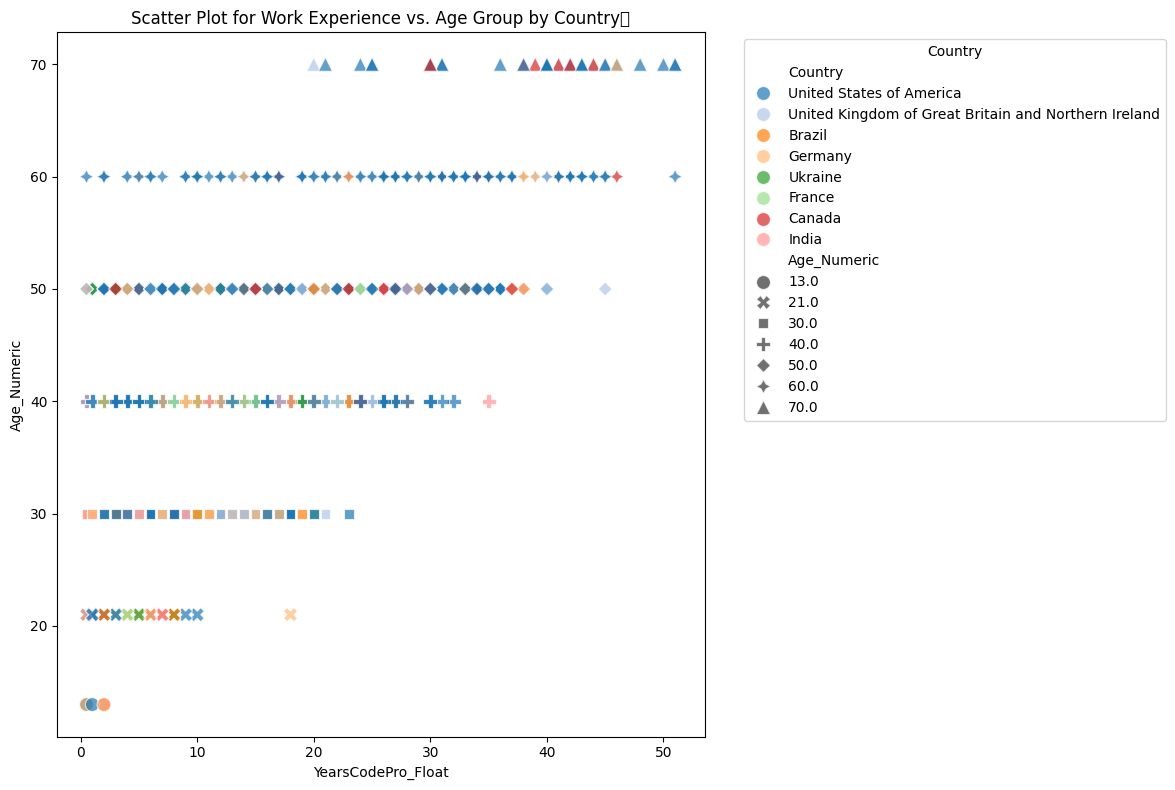

In [46]:
# 设置图形大小
plt.figure(figsize=(12, 8))

# 使用 seaborn 绘制散点图
sns.scatterplot(
    data=filtered_df,
    x='YearsCodePro_Float',  # x 轴：工作经验
    y='Age_Numeric',         # y 轴：年龄组
    hue='Country',           # 颜色区分国家/地区
    style='Age_Numeric',     # 标记区分年龄组
    palette='tab20',         # 颜色主题
    s=100,                   # 点的大小
    alpha=0.7                # 点的透明度
)

# 添加标题和标签
plt.title('Scatter Plot for Work Experience vs. Age Group by Country）')
plt.xlabel('YearsCodePro_Float')
plt.ylabel('Age_Numeric')

# 调整图例位置和样式
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# 显示图形
plt.tight_layout()
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
